In [23]:
import joblib
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, auc, fbeta_score, cohen_kappa_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, y_pred_proba):
    # General metrics
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    # Class-specific metrics
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    f2 = fbeta_score(y_true, y_pred, average=None, beta=2)
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    print("General Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    
    print("\nClass-specific Metrics:")
    for i, (p, r, f, f2_score) in enumerate(zip(precision, recall, f1, f2)):
        print(f"Class {i}:")
        print(f"  Precision: {p:.4f}")
        print(f"  Recall: {r:.4f}")
        print(f"  F1-score: {f:.4f}")
        print(f"  F2-score: {f2_score:.4f}")
    
    print("\nConfusion Matrix:")
    print(cm)

    # Calculate and print the ratio of predicted positives to actual positives
    actual_positives = np.sum(y_true == 1)
    predicted_positives = np.sum(y_pred == 1)
    ratio = predicted_positives / actual_positives if actual_positives > 0 else 0
    print(f"\nRatio of predicted positives to actual positives: {ratio:.4f}")


In [2]:
# Load the model and data
model_path = "/scratch/sao/vdiaz/workspace/starsml/scripts/models/full_negatives_weighted_lgbm_0-3_20240924_144100"  # Update this path
model = joblib.load(os.path.join(model_path, "model.joblib"))
X_test = joblib.load(os.path.join(model_path, "X_test.joblib"))
y_test = joblib.load(os.path.join(model_path, "y_test.joblib"))


In [21]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [24]:
print("Metrics for full test set:")
print_metrics(y_test, y_pred, y_pred_proba)

Metrics for full test set:
General Metrics:
Accuracy: 0.8765
Balanced Accuracy: 0.8431
Matthews Correlation Coefficient: 0.1903
ROC AUC: 0.9244
PR AUC: 0.3085
Cohen's Kappa: 0.0875

Class-specific Metrics:
Class 0:
  Precision: 0.9981
  Recall: 0.8771
  F1-score: 0.9337
  F2-score: 0.8989
Class 1:
  Precision: 0.0547
  Recall: 0.8091
  F1-score: 0.1024
  F2-score: 0.2152

Confusion Matrix:
[[942944 132084]
 [  1802   7637]]

Ratio of predicted positives to actual positives: 14.8025


In [33]:
y_pred_proba[y_test == 1].mean()

0.7358779086748615

(array([  2.,   9.,  15.,   9.,  20.,  15.,  21.,  18.,  26.,  22.,  25.,
         22.,  18.,  22.,  32.,  35.,  39.,  30.,  49.,  42.,  34.,  29.,
         41.,  37.,  33.,  46.,  44.,  34.,  39.,  43.,  33.,  42.,  52.,
         40.,  37.,  38.,  57.,  43.,  45.,  48.,  45.,  39.,  48.,  48.,
         54.,  57.,  46.,  50.,  62.,  55.,  53.,  52.,  55.,  54.,  59.,
         55.,  62.,  64.,  71.,  67.,  79.,  72.,  70.,  75.,  86.,  76.,
         80.,  77.,  76., 102.,  92., 104., 112., 105., 102., 102., 132.,
        105., 126., 126., 139., 130., 134., 140., 161., 168., 137., 172.,
        179., 170., 229., 207., 259., 292., 297., 309., 346., 493., 603.,
        593.]),
 array([0.00639096, 0.01622532, 0.02605967, 0.03589402, 0.04572838,
        0.05556273, 0.06539708, 0.07523144, 0.08506579, 0.09490014,
        0.1047345 , 0.11456885, 0.1244032 , 0.13423756, 0.14407191,
        0.15390626, 0.16374062, 0.17357497, 0.18340932, 0.19324368,
        0.20307803, 0.21291238, 0.22274674, 0.

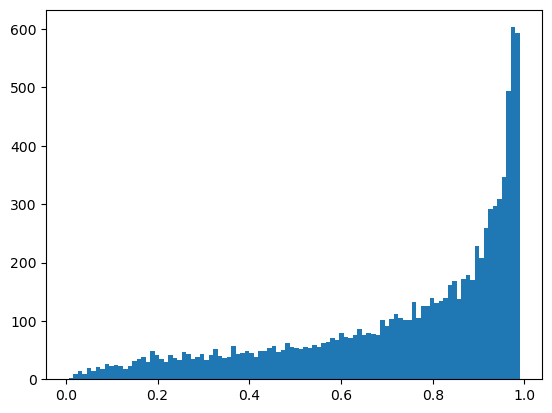

In [38]:
plt.hist(y_pred_proba[y_test == 1], bins=100)

In [9]:
# 2. confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 50})
    plt.title(title, fontsize=26)
    plt.ylabel('NWAY label', fontsize=26)
    plt.xlabel('Predicted label', fontsize=26)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.show()
    
    # percentage
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 50})
    plt.title(title + ' (Percentage)', fontsize=26)
    plt.ylabel('NWAY label', fontsize=26)
    plt.xlabel('Predicted label', fontsize=26)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.show()

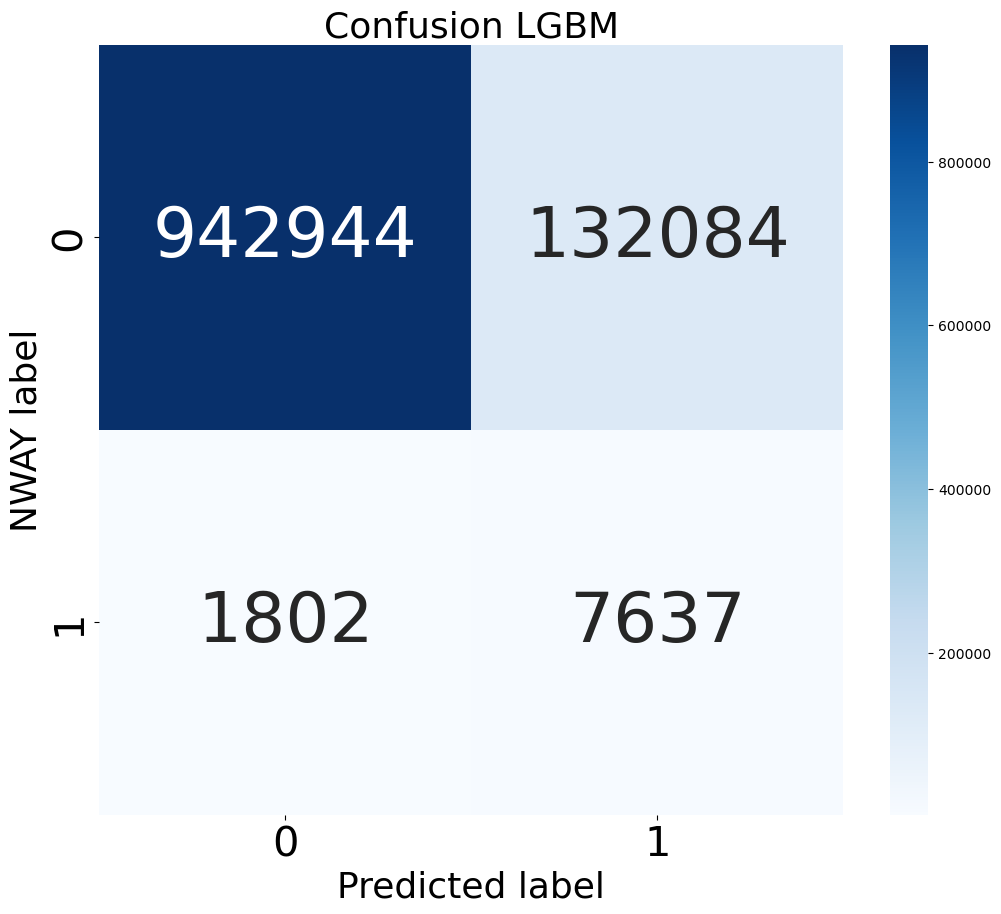

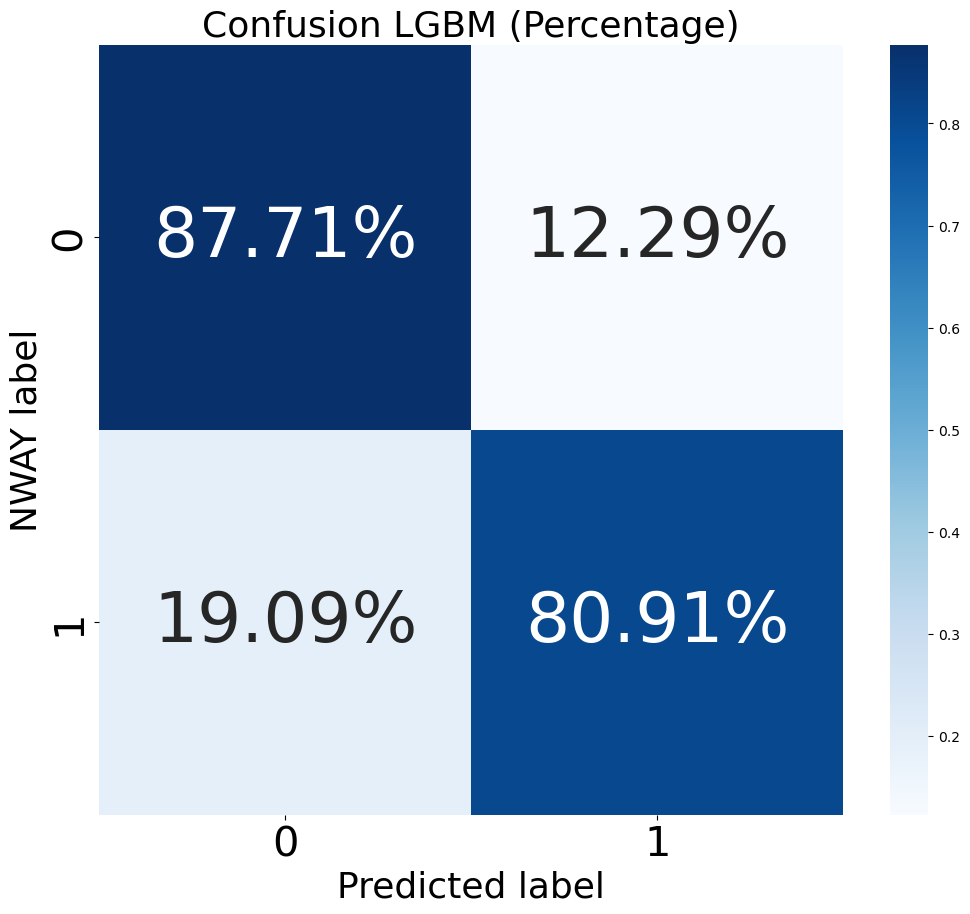

In [25]:
plot_confusion_matrix(y_test, y_pred, 'Confusion LGBM')

In [12]:
# Create balanced test set
pos_samples = X_test[y_test == 1]
neg_samples = X_test[y_test == 0]
n_pos = len(pos_samples)
balanced_neg_samples = resample(neg_samples, n_samples=n_pos, random_state=42)

In [26]:
X_test_balanced = pd.concat([pos_samples, balanced_neg_samples])
y_test_balanced = np.hstack([np.ones(n_pos), np.zeros(n_pos)])

# Make predictions on balanced test set
y_pred_balanced = model.predict(X_test_balanced)
y_pred_proba_balanced = model.predict_proba(X_test_balanced)[:, 1]

# Print metrics for balanced test set
print("\nMetrics for balanced test set:")
print_metrics(y_test_balanced, y_pred_balanced, y_pred_proba_balanced)



Metrics for balanced test set:
General Metrics:
Accuracy: 0.8444
Balanced Accuracy: 0.8444
Matthews Correlation Coefficient: 0.6906
ROC AUC: 0.9254
PR AUC: 0.9294
Cohen's Kappa: 0.6888

Class-specific Metrics:
Class 0:
  Precision: 0.8217
  Recall: 0.8798
  F1-score: 0.8497
  F2-score: 0.8675
Class 1:
  Precision: 0.8706
  Recall: 0.8091
  F1-score: 0.8387
  F2-score: 0.8207

Confusion Matrix:
[[8304 1135]
 [1802 7637]]

Ratio of predicted positives to actual positives: 0.9293


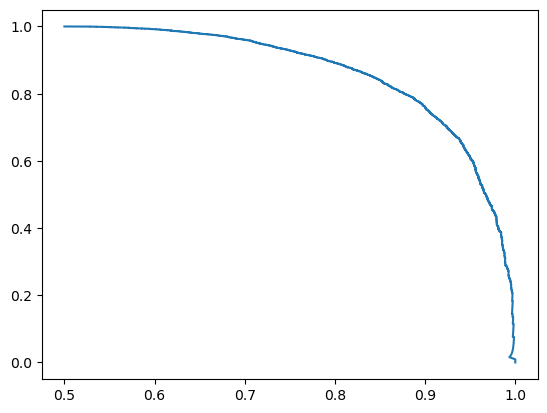

In [43]:
plt.plot(precision_recall_curve(y_test_balanced, y_pred_proba_balanced)[0], precision_recall_curve(y_test_balanced, y_pred_proba_balanced)[1])

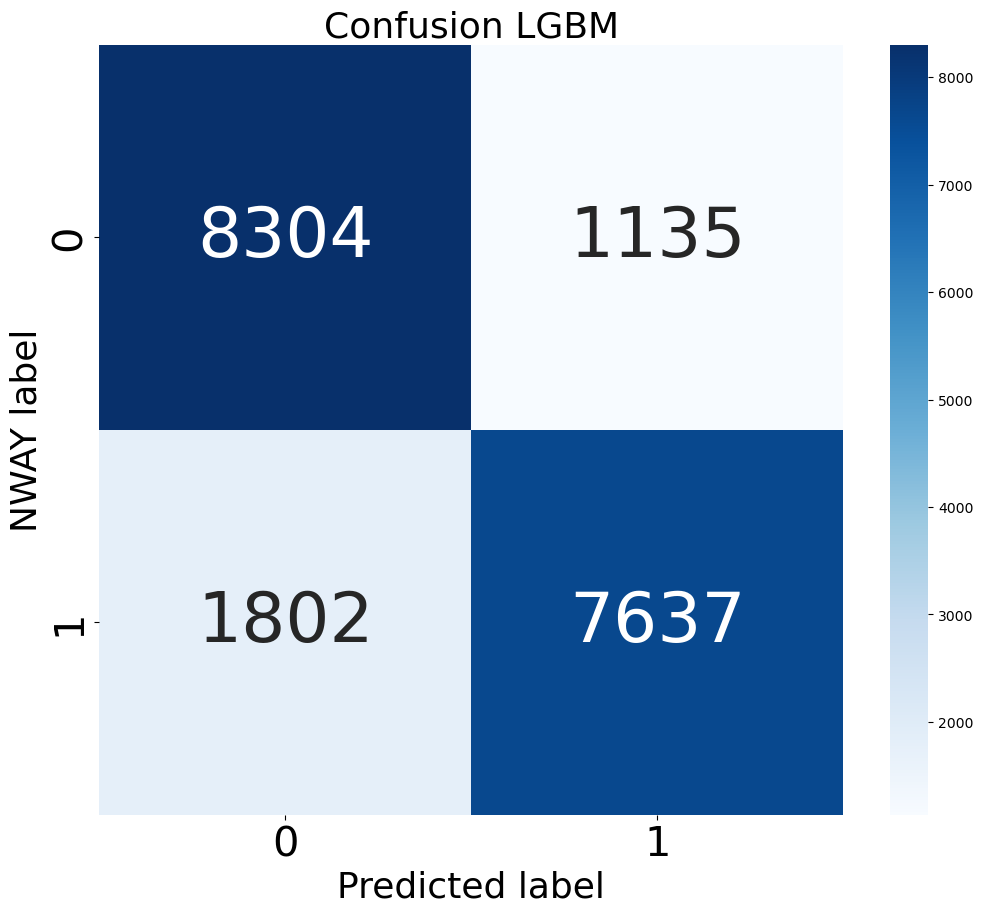

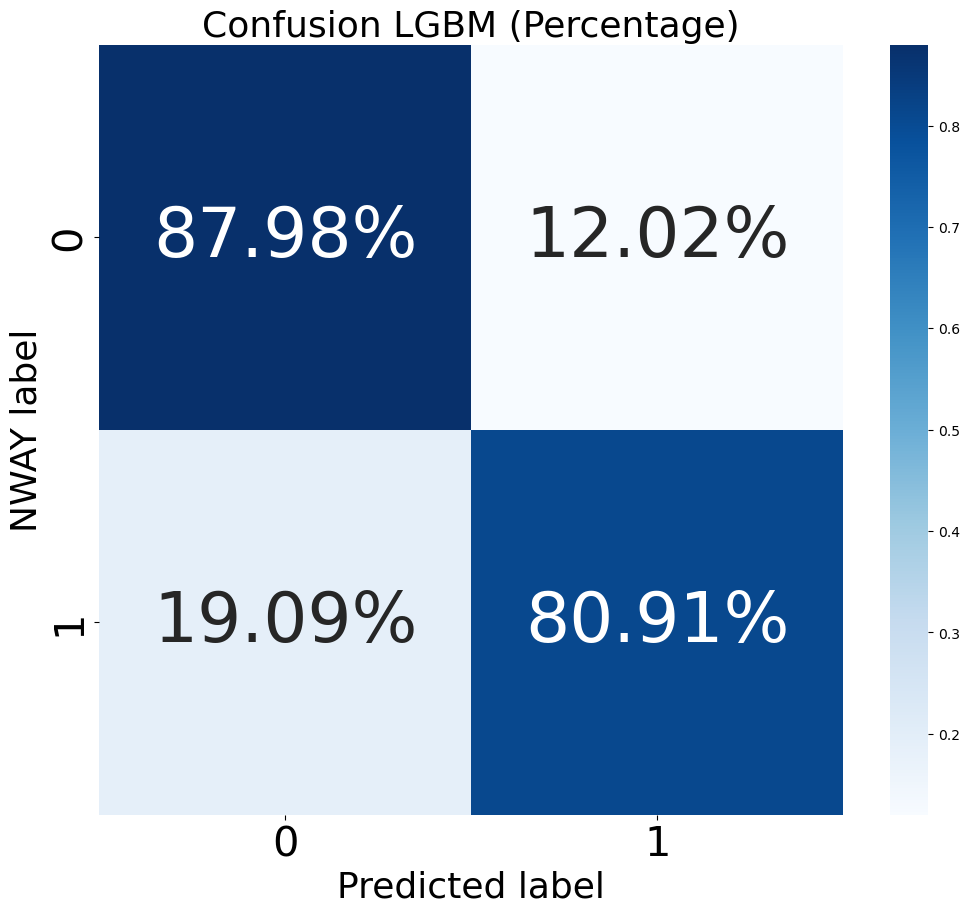

In [44]:
plot_confusion_matrix(y_test_balanced, y_pred_balanced, 'Confusion LGBM')